## Поиск максимального подмассива

### Задача поиска максимальной выгоды при купле/продаже акций на определенном отрезке времени

Создадим рандомный массив (фиксированный), визуально проанализируем, отметим максимальный подмассив.

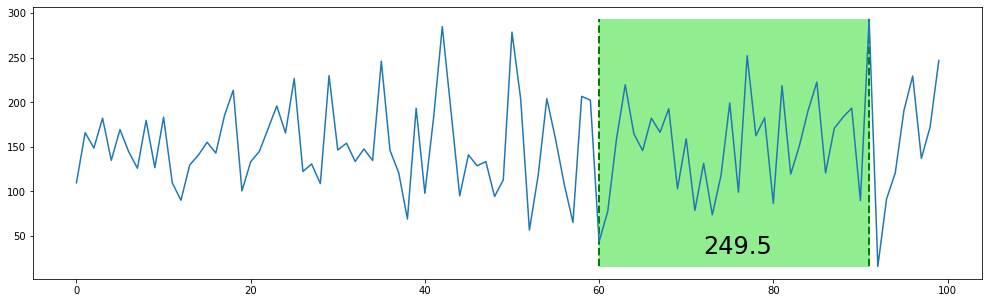

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(1000)
price = np.random.normal(loc=0, scale=50, size=100)
price += 150

plt.figure(figsize=(17, 5))
min_price = min(price)
max_price = max(price)
plt.vlines(x=60, ymin=min_price, ymax=max_price, colors='green', ls='--', lw=2)
plt.vlines(x=91, ymin=min_price, ymax=max_price, colors='green', ls='--', lw=2)
plt.fill_between(x=[60, 91], y1=min_price, y2=max_price, color='lightgreen')
plt.plot(price)
plt.text(72, 30, round(price[91] - price[60], 1), fontsize = 24)
plt.show()

### Тривиальный алгоритм за O($n^2$)

In [2]:
def find_max_subarray_trivial(price):
    maximum = 0
    left_ind = 0
    right_ind = 0

    for i in range(len(price)):
        for j in range(i, len(price)):
            value = round(price[j] - price[i], 1)
            if value > maximum:
                maximum = value
                left_ind = i
                right_ind = j
                
    return left_ind, right_ind, round(maximum, 1)

In [3]:
left_ind, right_ind, maximum = find_max_subarray_trivial(price)
print(f'maximum = {maximum}, left_ind = {left_ind}, right_ind = {right_ind}')

maximum = 249.5, left_ind = 60, right_ind = 91


### Алгориитм разделяй и властвуй за O(n*log n)

Задачe можно свести к нахождению максимального подмассива, если создать массив разниц текущего и предыдущего значения.

In [4]:
import pandas as pd
price_dif = list(price[i+1] - price[i] for i in range(0, len(price)-1))
price_dif.insert(0, 0)
pd.DataFrame([price, price_dif], index=['price', 'difference'])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
price,109.777085,166.046577,148.725856,182.216191,134.960166,169.473728,144.628135,126.000846,179.751775,126.766624,...,89.864834,293.088459,15.920378,91.559412,120.791789,190.912485,229.521862,137.085588,172.351452,246.920987
difference,0.000000,56.269493,-17.320721,33.490335,-47.256025,34.513561,-24.845593,-18.627289,53.750929,-52.985151,...,-103.609931,203.223625,-277.168081,75.639034,29.232377,70.120696,38.609377,-92.436273,35.265864,74.569535


Из таблицы очевидно, что после решения задачи нахождения максимального подмассива, из первого элемента необходимо вычесть 1 поскольку максимизируемая разница получается с его использованием.

In [5]:
def find_mid(A, low, mid, high):
    left_sum = A[mid-1]
    left_index = mid-1
    sum = 0
    for i in range(mid-1, low-1, -1):
        sum += A[i]
        if sum > left_sum:
            left_sum = sum
            left_index = i
        
    right_sum = A[mid]
    right_index = mid
    sum = 0
    for i in range(mid, high, 1):
        sum += A[i]
        if sum > right_sum:
            right_sum = sum
            right_index = i
    return (left_index, right_index, left_sum + right_sum)

def find_max_subarray(A, low, high):
    if (high-1) == low:
        return (low, high, A[low])
    else:
        mid = int((high + low)/2)
        (left_low, left_high, left_sum) = find_max_subarray(A, low, mid)
        (right_low, right_high, right_sum) = find_max_subarray(A, mid, high)
        (cross_low, cross_high, cross_sum) = find_mid(A, low, mid, high)

        if left_sum > right_sum and left_sum > cross_sum:
            return (left_low, left_high, left_sum)
        elif right_sum >= left_sum and right_sum > cross_sum:
            return (right_low, right_high, right_sum)
        else:
            return (cross_low, cross_high, cross_sum)

In [6]:
left_ind, right_ind, maximum = find_max_subarray(price_dif, 0, len(price_dif))
print(f'maximum = {round(maximum, 1)}, left_ind = {left_ind-1}, right_ind = {right_ind}')

maximum = 249.5, left_ind = 60, right_ind = 91


Создадим функцию - добавив перевод массива в нужный формат и вычитание единицы из индекса левой границы

In [7]:
def find_max_subarray_divide(price):
    price_dif = list(price[i+1] - price[i] for i in range(0, len(price)-1))
    price_dif.insert(0, 0)
    left_ind, right_ind, maximum = find_max_subarray(price_dif, 0, len(price_dif))
    return left_ind-1, right_ind, round(maximum, 1)

In [8]:
left_ind, right_ind, maximum = find_max_subarray_divide(price)
print(f'maximum = {maximum}, left_ind = {left_ind}, right_ind = {right_ind}')

maximum = 249.5, left_ind = 60, right_ind = 91


### Алгоритм поиска за линейное время O(n)

In [27]:
def find_max_subarray_line(price):
    price_dif = list(price[i+1] - price[i] for i in range(0, len(price)-1))
    price_dif.insert(0, 0)
    left_ind = 0
    right_ind = 0
    prev = price_dif[0]
    prev_ind = 0
    maximum = price_dif[0]

    for i in range(1, len(price_dif)):
        if prev + price_dif[i] > price_dif[i]:
            prev += price_dif[i]
        else:
            prev = price_dif[i]
            prev_ind = i

        if prev > maximum:
            maximum = prev
            right_ind = i
            left_ind = prev_ind

    return left_ind-1, right_ind, round(maximum, 1)

In [28]:
left_ind, right_ind, maximum = find_max_subarray_line(price)
print(f'maximum = {maximum}, left_ind = {left_ind}, right_ind = {right_ind}')

maximum = 249.5, left_ind = 60, right_ind = 91


### Визуальное сравнение скорости работы алгоритмов

In [1]:
def count_time(func, price):
    start_time = time.time()
    func(price)
    return(time.time() - start_time)
    
lst_n = []
lst_time_trivial = []
lst_time_divide = []
lst_time_line = []
n = 1

for x in range(1, 12, 2):
    n = 2**x
    lst_n.append(n)
    price = np.random.normal(loc=0, scale=50, size=n)
    price += 150
    lst_time_trivial.append(count_time(find_max_subarray_trivial, price))
    lst_time_divide.append(count_time(find_max_subarray_divide, price))
    lst_time_line.append(count_time(find_max_subarray_line, price))

NameError: name 'np' is not defined

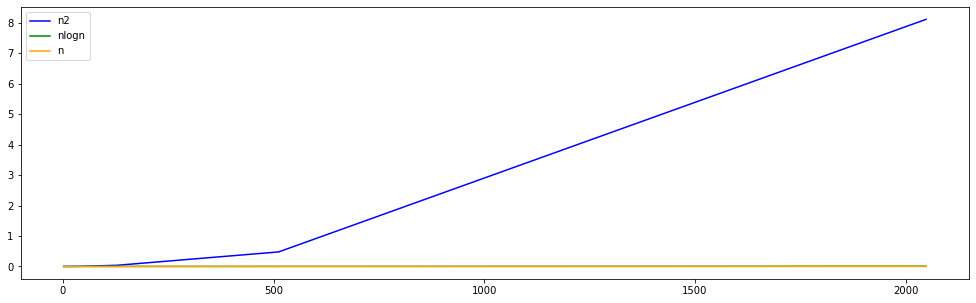

In [45]:
plt.figure(figsize=(17, 5))
plt.plot(lst_n, lst_time_trivial, label='n2', color='blue')
plt.plot(lst_n, lst_time_divide, label='nlogn', color='green')
plt.plot(lst_n, lst_time_line, label='n', color='orange')
plt.legend()
plt.show()

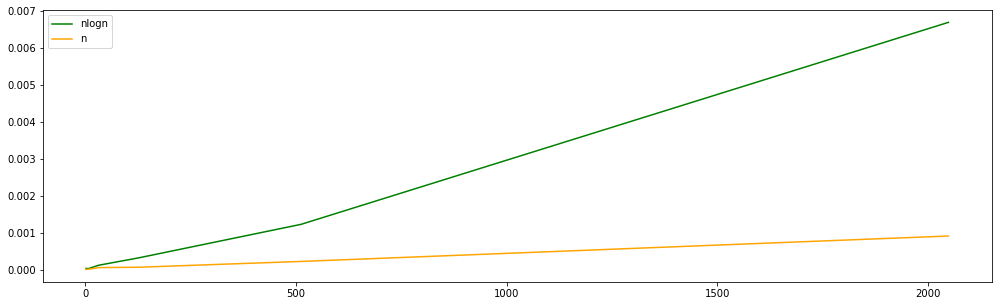

In [46]:
plt.figure(figsize=(17, 5))
plt.plot(lst_n, lst_time_divide, label='nlogn', color='green')
plt.plot(lst_n, lst_time_line, label='n', color='orange')
plt.legend()
plt.show()